<a href="https://colab.research.google.com/github/56nh4/zoeywu/blob/main/%E5%8F%B0%E7%81%A3%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E5%80%8B%E8%82%A1%E6%AF%8F%E6%97%A5%E6%88%90%E4%BA%A4%E8%B3%87%E8%A8%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EX03-05 台灣股票市場個股每日成交資訊
- [臺灣證券交易所個股日成交資訊](https://www.twse.com.tw/zh/trading/historical/stock-day.html)
- 請使用 pd.read_html() 取得 0050 的過去一年的日成交資訊，並繪製收盤價的折線圖及成交量的長條圖。

In [1]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-04-29 07:48:06--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.137.101, 74.125.137.100, 74.125.137.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-29 07:48:06--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  72.8MB/s    in 0.3s    

2025-04-29 07:48:09 (72.

In [2]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [9]:
import pandas as pd

def get_stock_data(date, stock_no):
  url = f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html'
  df = pd.read_html(url,header=1)[0]
  return df

'''
date_list = []
for i in range(3,16):
  year = 2024 + (i//12)
  mnth = i%12 + 1
  date_list.append(f'{year}{mnth:02}01')
'''

date_range = pd.date_range(start='20240401',end='20250401',freq='MS')
date_list = date_range.strftime('%Y%m%d').to_list()

df = pd.DataFrame()
for date in date_list:
  df = pd.concat([df, get_stock_data(date,'0050')], ignore_index=True)

df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/04/01,5727780,904051439,158.20,158.75,157.25,157.40,-0.5,9814
1,113/04/02,7924481,1261718566,158.45,159.65,158.40,159.65,2.25,11341
2,113/04/03,5042947,799119313,158.65,158.90,157.80,158.55,-1.1,10098
3,113/04/08,6124837,976164820,158.65,159.85,158.55,159.45,0.9,12306
4,113/04/09,9043462,1465418271,160.00,163.35,159.90,163.25,3.8,15355
...,...,...,...,...,...,...,...,...,...
255,114/04/23,16545775,2677643864,160.30,163.10,160.30,162.85,6.9,26829
256,114/04/24,14351450,2335488916,163.90,164.05,161.30,161.90,-0.95,29832
257,114/04/25,18651089,3100147680,166.20,166.95,165.50,165.75,3.85,31456
258,114/04/28,12807837,2140130704,166.80,167.50,166.80,167.15,1.4,21747


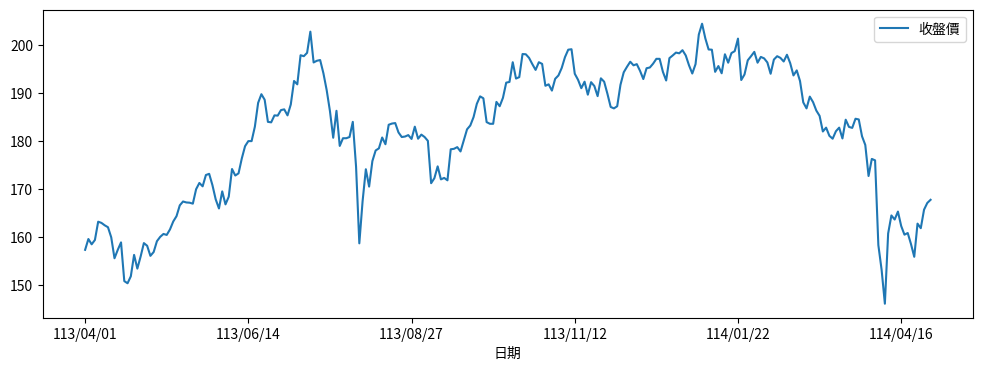

In [10]:
df.plot(kind='line',x='日期',y='收盤價',figsize=(12,4))
plt.show()

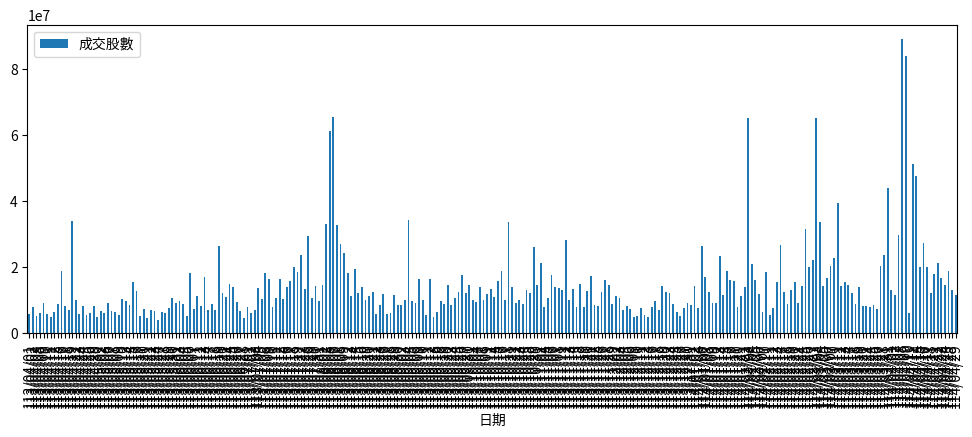

In [11]:
df.plot(kind='bar',x='日期',y='成交股數',figsize=(12,4))
plt.show()

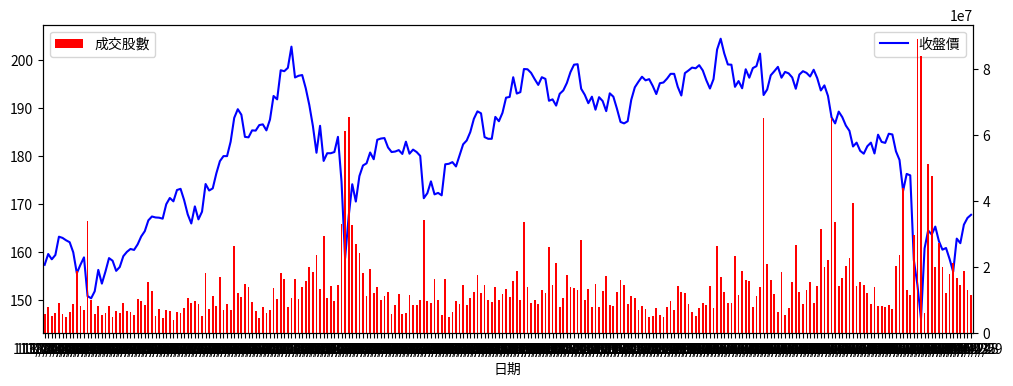

In [12]:
fig, ax1 = plt.subplots(figsize=(12,4))

df.plot(kind='line',x='日期',y='收盤價',ax=ax1,color='blue')

ax2 = ax1.twinx()
df.plot(kind='bar',x='日期',y='成交股數',ax=ax2,color='red')

plt.show()

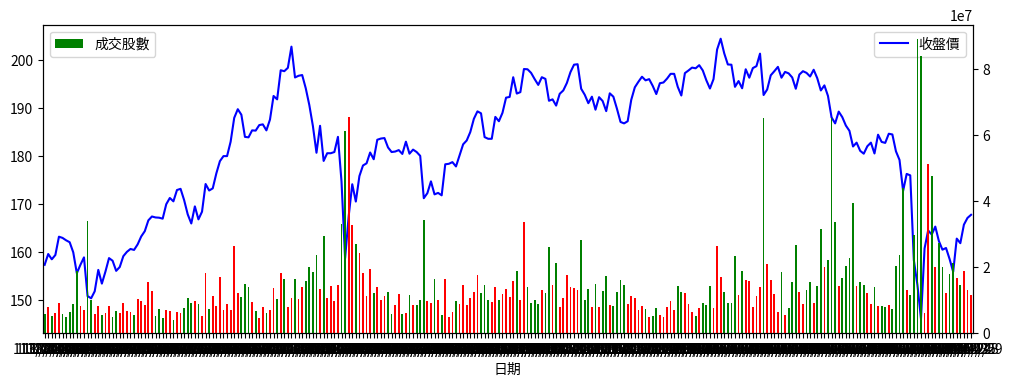

In [14]:
df['漲跌價差'] = pd.to_numeric(df['漲跌價差'],errors='coerce')
df['Color'] = df['漲跌價差'].apply(lambda x: 'green' if x < 0 else 'red')

fig, ax1 = plt.subplots(figsize=(12,4))
df.plot(kind='line',x='日期',y='收盤價',ax=ax1,color='blue')
ax2 = ax1.twinx()
df.plot(kind='bar',x='日期',y='成交股數',ax=ax2,color=df['Color'])


plt.show()